In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('census_income_data.csv')

In [22]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Transport-moving,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
df['sex']

0        Female
1        Female
2        Female
3        Female
4        Female
          ...  
32556      Male
32557    Female
32558      Male
32559    Female
32560      Male
Name: sex, Length: 32561, dtype: object

In [21]:
for i in df.columns:
    if len(list(df[i].unique())) == len(df[i]):
        df = df.drop(i, axis=1)
    else:
        df[i] = df[i].apply(lambda x : np.random.choice(a=list(df[i].value_counts().keys()), p=[df[i].value_counts()[j]/sum(df[i].value_counts()) for j in list(df[i].value_counts().keys())]) if x == '?' else x)

In [24]:
X = df.drop('sex', axis=1)
y = df['sex']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=66)

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
lab = LabelEncoder()

In [33]:
X_train

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,capital.gain,capital.loss,hours.per.week,native.country,income
11687,28,Federal-gov,329426,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,0,0,40,United-States,<=50K
27313,28,Private,191935,Assoc-acdm,12,Never-married,Sales,Own-child,White,0,0,20,United-States,<=50K
31281,25,Private,106491,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,0,0,48,United-States,<=50K
21214,50,Private,174102,HS-grad,9,Divorced,Craft-repair,Own-child,White,0,0,40,Puerto-Rico,<=50K
24541,59,Private,108765,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,0,0,50,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29818,42,Private,344572,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,0,0,40,United-States,>50K
8243,30,Private,142675,12th,8,Married-civ-spouse,Craft-repair,Husband,White,0,0,50,United-States,<=50K
8823,38,Private,204668,Assoc-voc,11,Separated,Other-service,Unmarried,White,0,0,25,United-States,<=50K
25404,44,Private,186916,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,0,0,50,United-States,>50K


In [34]:
for i in X_train.columns:
    if X_train[i].dtype == object:
        X_train[i] = lab.fit_transform(X_train[i])
        X_test[i] = lab.transform(X_test[i])

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()

In [38]:
X_train = scaler.fit_transform(X_train)

In [39]:
X_test = scaler.transform(X_test)

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

In [43]:
model = RandomForestClassifier()

In [44]:
hyper_param = {
    'n_estimators': [65, 75, 90],
    'criterion': ['gini', 'entropy'],
    'max_depth': [4, 6 , 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2],
    'min_weight_fraction_leaf': [0.0, 0.1]
}

In [45]:
full_model = GridSearchCV(model, hyper_param, cv=3, verbose=2)

In [46]:
full_model.fit(X_train, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=65; total time=   0.5s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=65; total time=   0.5s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=65; total time=   0.5s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=75; total time=   0.5s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=75; total time=   0.5s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=75; total time=   0.5s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_sampl

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4],
                         'min_weight_fraction_leaf': [0.0, 0.1],
                         'n_estimators': [65, 75, 90]},
             verbose=2)

In [48]:
cross_val_score(RandomForestClassifier(),X_train,y_train, cv = 5, scoring= 'accuracy').mean()

0.8326371826371826

In [49]:
y_pred = full_model.predict(X_test)

In [50]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay , accuracy_score,  precision_score

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Female       0.77      0.71      0.74      2681
        Male       0.86      0.90      0.88      5460

    accuracy                           0.83      8141
   macro avg       0.81      0.80      0.81      8141
weighted avg       0.83      0.83      0.83      8141



In [52]:
accuracy_score(y_test, y_pred)

0.8331900257953568

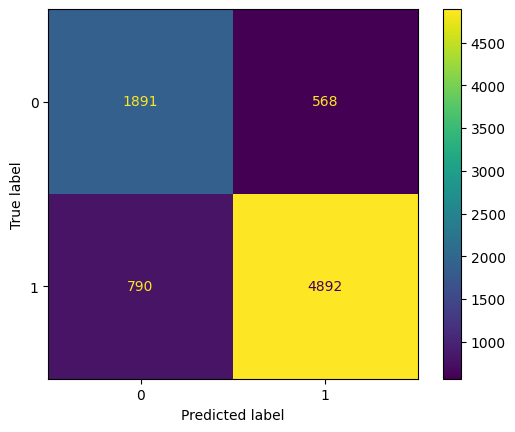

In [53]:
ConfusionMatrixDisplay(confusion_matrix(y_pred, y_test)).plot()